Performance by Topic:
                                      topic  accuracy_percentage  final_score  \
0               Body Fluids and Circulation            72.333333    78.666667   
1              Body Fluids and Circulation             80.000000    51.333333   
2                        Human Reproduction            38.000000    24.000000   
3                       Reproductive Health            43.000000    35.000000   
4              Respiration and Gas Exchange            66.000000    21.000000   
5                 human health and disease             93.000000   110.000000   
6                 microbes in human welfare           100.000000    76.000000   
7  principles of inheritance and variation             30.000000     5.000000   
8                      reproductive health             92.000000    50.500000   

   mistakes_corrected  questions_count  
0            6.666667            100.0  
1            1.333333             23.0  
2            0.000000             89.0  
3  

<ipython-input-2-a27bdb96de9f>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topic_performance, x="accuracy_percentage", y="topic", palette="viridis")


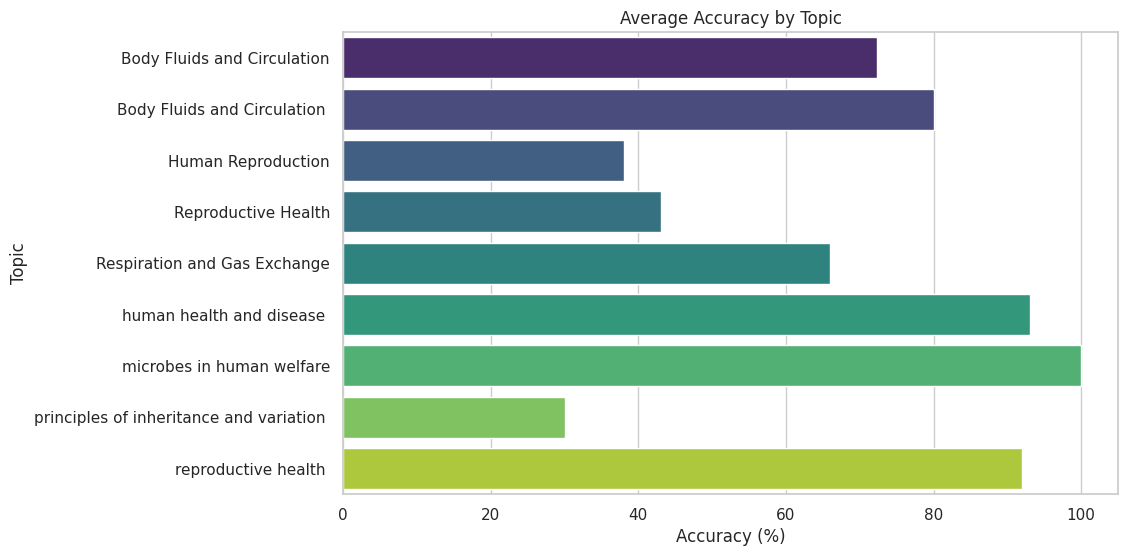

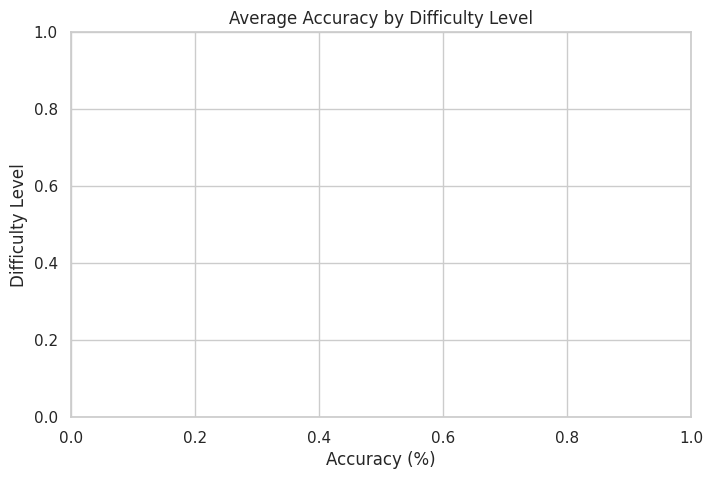

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Load the data from API endpoint
url = "https://api.jsonserve.com/XgAgFJ"
response = requests.get(url)
data = response.json()

# Convert the JSON data to a pandas DataFrame
quiz_data = []
for record in data:
    quiz_info = record["quiz"]
    quiz_data.append({
        "quiz_id": record["quiz_id"],
        "user_id": record["user_id"],
        "score": record["score"],
        "accuracy": record["accuracy"],
        "final_score": record["final_score"],
        "mistakes_corrected": record["mistakes_corrected"],
        "topic": quiz_info["topic"],
        "difficulty_level": quiz_info.get("difficulty_level", "Unknown"),
        "questions_count": quiz_info["questions_count"],
        "correct_answers": record["correct_answers"],
        "incorrect_answers": record["incorrect_answers"],
        "negative_score": record["negative_score"],
        "better_than": record["better_than"],
    })

quiz_df = pd.DataFrame(quiz_data)

# Clean and process the data
quiz_df["accuracy_percentage"] = quiz_df["accuracy"].str.rstrip(" %").astype(float)
quiz_df["final_score"] = quiz_df["final_score"].astype(float)
quiz_df["negative_score"] = quiz_df["negative_score"].astype(float)

# Analyze performance by topic
topic_performance = quiz_df.groupby("topic").agg({
    "accuracy_percentage": "mean",
    "final_score": "mean",
    "mistakes_corrected": "mean",
    "questions_count": "mean",
}).reset_index()

print("Performance by Topic:")
print(topic_performance)

# Analyze performance by difficulty level
difficulty_performance = quiz_df.groupby("difficulty_level").agg({
    "accuracy_percentage": "mean",
    "final_score": "mean",
    "mistakes_corrected": "mean",
}).reset_index()

print("\nPerformance by Difficulty Level:")
print(difficulty_performance)

# Visualizations
sns.set(style="whitegrid")

# Accuracy by topic
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_performance, x="accuracy_percentage", y="topic", palette="viridis")
plt.title("Average Accuracy by Topic")
plt.xlabel("Accuracy (%)")
plt.ylabel("Topic")
plt.show()

# Accuracy by difficulty level
plt.figure(figsize=(8, 5))
sns.barplot(data=difficulty_performance, x="accuracy_percentage", y="difficulty_level", palette="coolwarm")
plt.title("Average Accuracy by Difficulty Level")
plt.xlabel("Accuracy (%)")
plt.ylabel("Difficulty Level")
plt.show()


In [3]:
def generate_insights(user_id):
    user_data = quiz_df[quiz_df["user_id"] == user_id]
    if user_data.empty:
        print(f"No data available for user: {user_id}")
        return

    # Weak Areas
    weak_topics = user_data.groupby("topic").agg({
        "accuracy_percentage": "mean",
        "final_score": "mean"
    }).sort_values("accuracy_percentage").head(3)

    print("\n### Weak Areas ###")
    print(weak_topics)

    # Improvement Trends
    user_data = user_data.sort_values("accuracy_percentage", ascending=True)
    improvement_trend = user_data.tail(3)[["topic", "accuracy_percentage", "final_score"]]

    print("\n### Improvement Trends ###")
    print(improvement_trend)

# Generate insights for a specific user
specific_user_id = "YcDFSO4ZukTJnnFMgRNVwZTE4j42"  # Replace with a valid user ID
generate_insights(specific_user_id)



### Weak Areas ###
                                          accuracy_percentage  final_score
topic                                                                     
principles of inheritance and variation                  30.0          5.0
Human Reproduction                                       38.0         24.0
Reproductive Health                                      43.0         35.0

### Improvement Trends ###
                          topic  accuracy_percentage  final_score
1  Body Fluids and Circulation                 100.0         92.0
8     microbes in human welfare                100.0         76.0
9          reproductive health                 100.0         40.0


In [4]:
def generate_recommendations(user_id):
    user_data = quiz_df[quiz_df["user_id"] == user_id]
    if user_data.empty:
        print(f"No data available for user: {user_id}")
        return

    weak_topics = user_data.groupby("topic").agg({
        "accuracy_percentage": "mean"
    }).sort_values("accuracy_percentage").head(3)

    recommendations = []
    for topic in weak_topics.index:
        recommendations.append(f"Focus more on topic: {topic}")

    print("\n### Recommendations ###")
    for rec in recommendations:
        print(rec)

# Generate recommendations for a specific user
generate_recommendations(specific_user_id)



### Recommendations ###
Focus more on topic: principles of inheritance and variation 
Focus more on topic: Human Reproduction
Focus more on topic: Reproductive Health



### Student Persona ###
User ID: YcDFSO4ZukTJnnFMgRNVwZTE4j42
Persona Label: Strategic Improver
Average Accuracy: 72.21%
Average Final Score: 54.43
Average Mistakes Corrected: 2.86

### Strengths ###
✔ Strong in microbes in human welfare with 100.00% accuracy.
✔ Strong in human health and disease  with 93.00% accuracy.
✔ Strong in reproductive health  with 92.00% accuracy.

### Weaknesses ###
✘ Needs improvement in principles of inheritance and variation  with only 30.00% accuracy.
✘ Needs improvement in Human Reproduction with only 38.00% accuracy.
✘ Needs improvement in Reproductive Health with only 43.00% accuracy.


<ipython-input-5-a71cf967157f>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_data.reset_index(), x="accuracy_percentage", y="topic", palette="coolwarm")


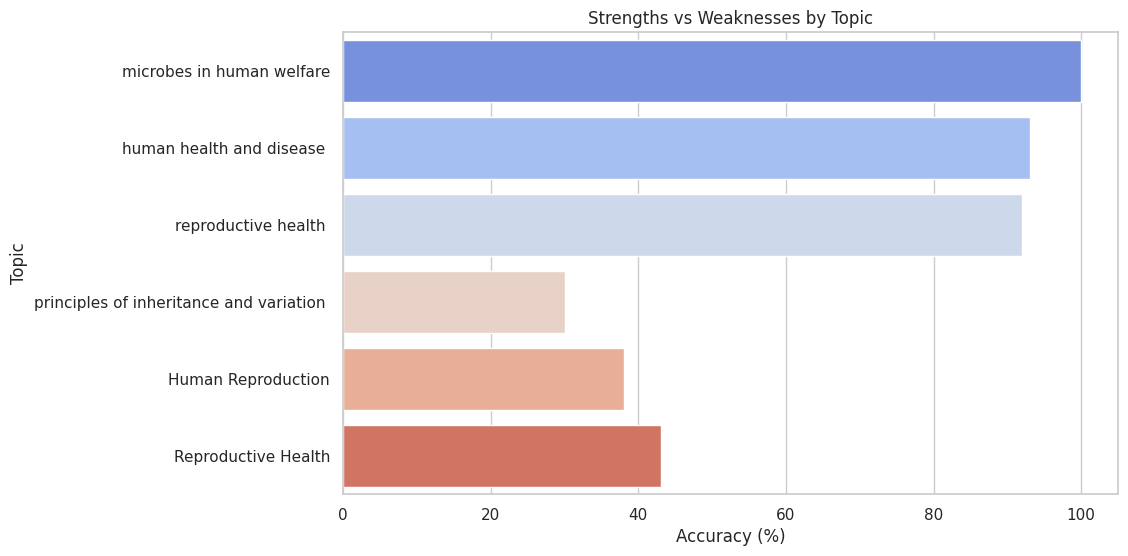

In [5]:
def define_student_persona(user_id):
    user_data = quiz_df[quiz_df["user_id"] == user_id]

    if user_data.empty:
        print(f"No data available for user: {user_id}")
        return

    # Calculate aggregated performance
    avg_accuracy = user_data["accuracy_percentage"].mean()
    avg_final_score = user_data["final_score"].mean()
    avg_mistakes_corrected = user_data["mistakes_corrected"].mean()

    # Strengths: Topics with high accuracy
    strengths = user_data.groupby("topic").agg({
        "accuracy_percentage": "mean",
        "final_score": "mean"
    }).sort_values("accuracy_percentage", ascending=False).head(3)

    # Weaknesses: Topics with low accuracy
    weaknesses = user_data.groupby("topic").agg({
        "accuracy_percentage": "mean",
        "final_score": "mean"
    }).sort_values("accuracy_percentage").head(3)

    # Persona Labels
    if avg_accuracy >= 90:
        persona_label = "Accuracy Ace"
    elif avg_accuracy >= 75:
        persona_label = "Consistent Performer"
    else:
        persona_label = "Strategic Improver"

    if avg_mistakes_corrected >= 5:
        persona_label += " & Resilient Learner"

    # Generate Persona Insights
    print("\n### Student Persona ###")
    print(f"User ID: {user_id}")
    print(f"Persona Label: {persona_label}")
    print(f"Average Accuracy: {avg_accuracy:.2f}%")
    print(f"Average Final Score: {avg_final_score:.2f}")
    print(f"Average Mistakes Corrected: {avg_mistakes_corrected:.2f}")

    print("\n### Strengths ###")
    for topic in strengths.index:
        print(f"✔ Strong in {topic} with {strengths.loc[topic, 'accuracy_percentage']:.2f}% accuracy.")

    print("\n### Weaknesses ###")
    for topic in weaknesses.index:
        print(f"✘ Needs improvement in {topic} with only {weaknesses.loc[topic, 'accuracy_percentage']:.2f}% accuracy.")

    # Visualization: Strengths vs Weaknesses
    performance_data = pd.concat([strengths, weaknesses])
    plt.figure(figsize=(10, 6))
    sns.barplot(data=performance_data.reset_index(), x="accuracy_percentage", y="topic", palette="coolwarm")
    plt.title("Strengths vs Weaknesses by Topic")
    plt.xlabel("Accuracy (%)")
    plt.ylabel("Topic")
    plt.show()

# Define persona for a specific user
specific_user_id = "YcDFSO4ZukTJnnFMgRNVwZTE4j42"  # Replace with a valid user ID
define_student_persona(specific_user_id)
